## Cadenas de Markov de tiempo discreto

### Introducción

Veamos un ejemplo sencillo para empezar.

Cuando CJ está triste, lo que no es muy habitual: o sale a correr, o se zampa un helado o se echa una siesta. Por los datos históricos, si pasó durmiendo un día triste, al día siguiente hay un 60% de probabilidades de que salga a correr, un 20% de que se quede en la cama y un 20% de que se coma un helado. Cuando está triste y sale a correr, hay un 60% de probabilidades de que salga a correr al día siguiente, un 30% de que se atiborre de helado y sólo un 10% de probabilidades de que pase durmiendo al día siguiente. Por último, cuando se da un capricho con un helado en un día triste, sólo hay un 10% de probabilidades de que siga comiendo helado al día siguiente también, un 70% de probabilidades de que salga a correr y un 20% de probabilidades de que pase durmiendo al día siguiente.

![](imagen5-1.png)

La cadena de Markov representada en el diagrama de estados tiene 3 estados posibles: dormir, correr, helado. Por tanto, la matriz de transición será una matriz de 3 x 3. Observa que las flechas que salen de un estado siempre suman exactamente 1, del mismo modo que las entradas de cada fila de la matriz de transición deben sumar exactamente 1, lo que representa la distribución de probabilidad. En la matriz de transición, las celdas hacen la misma función que las flechas en el diagrama de estados.

In [1]:
from scipy.stats import expon
from scipy.integrate import quad
from scipy.integrate import dblquad
import numpy as np
import random as rm

states = ["Sleep","Icecream","Run"]

# Possible sequences of events
transitionName = [["SS","SR","SI"],["RS","RR","RI"],["IS","IR","II"]]

# Probabilities matrix (transition matrix)
transitionMatrix = [[0.2,0.6,0.2],[0.1,0.6,0.3],[0.2,0.7,0.1]]


if sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[1]) != 3:
    print("Hay algo erróneo, la matriz de transición")
else: print("Todo está correcto, puedes seguir a otro estado")



Todo está correcto, puedes seguir a otro estado


In [2]:
def activity_forecast(days):
    # Choose the starting state
    activityToday = "Sleep"
    print("Estado de inicio: " + activityToday)
    activityList = [activityToday]
    i = 0
    # Calculo de la probabilidad
    prob = 1
    while i != days:
        if activityToday == "Sleep":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Sleep")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityToday = "Run"
                activityList.append("Run")
            else:
                prob = prob * 0.2
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Run":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.5
                activityList.append("Run")
                pass
            elif change == "RS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.3
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Icecream":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "II":
                prob = prob * 0.1
                activityList.append("Icecream")
                pass
            elif change == "IS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.7
                activityToday = "Run"
                activityList.append("Run")
        i += 1  
    print("Estados Posibles: " + str(activityList))
    print("Fin de estado después de "+ str(days) + " dias: " + activityToday)
    print("Probabilidad de la posible secuencia de estados: " + str(prob))

# Función que predice el posible estado para los siguientes dos 2 días
activity_forecast(2)

Estado de inicio: Sleep
Estados Posibles: ['Sleep', 'Icecream', 'Run']
Fin de estado después de 2 dias: Run
Probabilidad de la posible secuencia de estados: 0.13999999999999999


## Ejemplo

Modelizaremos el comportamiento de un coche, utilizando una matriz de transición y probabilidades de partida. La matriz define las probabilidades de transición entre diferentes estados, incluyendo la aceleración, el mantenimiento de una velocidad constante, el ralentí y el frenado.

![](imagen5-2.png)

In [3]:
import random

# Definimos una matriz de transición para la cadena de Markov
transition_matrix = {
    'accelerate': {'accelerate': 0.3, 'constant speed': 0.2, 'idling': 0 , 'break': 0.5 },
    'constant speed': {'accelerate': 0.1, 'constant speed': 0.4, 'idling': 0 , 'break': 0.5 },
    'idling': {'accelerate': 0.8, 'constant speed': 0, 'idling': 0.2 , 'break': 0 },
    'break': {'accelerate': 0.4, 'constant speed': 0.05, 'idling': 0.5 , 'break': 0.05 },
}

# Definimos las probabilidades iniciales para cada estado
starting_probabilities = {'accelerate': 0, 'constant speed': 0, 'idling': 0, 'break': 1}

# Seleccionamos aleatoriamente el estado inciaial basado en las probabilitdades iniciales
current_state = random.choices(
    population=list(starting_probabilities.keys()),
    weights=list(starting_probabilities.values())
)[0]

# Generamos una secuencia de estados utilizando la matriz de transicion
num_iterations = 10
for i in range(num_iterations):
    print(current_state)
    next_state = random.choices(
        population=list(transition_matrix[current_state].keys()),
        weights=list(transition_matrix[current_state].values())
    )[0]
    current_state = next_state

break
accelerate
accelerate
break
idling
accelerate
break
idling
accelerate
accelerate


### Calculo de estados estacionarios

Cadena de Markov para predecir la secuencia de Pérdida, Empate, Victoria de un equipo de fútbol.

In [4]:
#definimos los estados

states = {
    -1 : "Loss",
    0 : "Draw",
    1 : "Win"
}
print("Estados posibles", states)

transition = np.array([[0.65, 0.1, 0.25],[0.3,0.5,0.2],[0.35,0.1,0.55]])
print("Matriza de transición:\n",transition)

Estados posibles {-1: 'Loss', 0: 'Draw', 1: 'Win'}
Matriza de transición:
 [[0.65 0.1  0.25]
 [0.3  0.5  0.2 ]
 [0.35 0.1  0.55]]


Vamos a seleccionar una secuencia aleatoria de estados

In [5]:
n = 15
br=0
points = 0
start_state = 0
print(states[start_state], "-->", end=" ")
prev_state = start_state

while n:
    if(prev_state==0):
        points+=1
    elif(prev_state==1):
        points+=3
    curr_state = np.random.choice([-1,0,1], p =transition[prev_state+1])
    print(states[curr_state], "-->", end=" ")
    prev_state=curr_state
    n-=1
    br+=1
print("stop")
if(prev_state==0):
        points+=1
elif(prev_state==1):
        points+=3
print("Equipo A: ", points)
print("Porcentaje sobre puntos posibles: ", (points)/(3*br))

Draw --> Draw --> Draw --> Draw --> Win --> Win --> Loss --> Loss --> Loss --> Win --> Draw --> Win --> Win --> Draw --> Loss --> Loss --> stop
Equipo A:  21
Porcentaje sobre puntos posibles:  0.4666666666666667


Vamos a calcular potencias de la mtriz de transición

In [6]:
steps = 15
transition_n = transition
for i in range(steps):
    transition_n=np.matmul(transition_n,transition)

print("La potencia",steps, "de la matriz de transición\n ", transition, "\n es: \n",transition_n)

La potencia 15 de la matriz de transición
  [[0.65 0.1  0.25]
 [0.3  0.5  0.2 ]
 [0.35 0.1  0.55]] 
 es: 
 [[0.48809528 0.1666666  0.34523813]
 [0.48809506 0.16666702 0.34523792]
 [0.48809527 0.1666666  0.34523813]]


Veamos ahora utilizando valores y vectores propios

In [7]:
import scipy.linalg
values, left = scipy.linalg.eig(transition, right = False, left = True)
print("left eigen vectors =\n", left, "\n")
print("eigen values = \n", values)

left eigen vectors =
 [[-7.86428295e-01 -7.07106781e-01  4.08248290e-01]
 [-2.68536491e-01  6.86972768e-16 -8.16496581e-01]
 [-5.56254160e-01  7.07106781e-01  4.08248290e-01]] 

eigen values = 
 [1. +0.j 0.3+0.j 0.4+0.j]


Normalizando

In [8]:
pi = left[:,0]
pi_normalized = [(x/np.sum(pi)).real for x in pi]
print("P normalizada = ", pi_normalized)

P normalizada =  [np.float64(0.4880952380952383), np.float64(0.16666666666666652), np.float64(0.34523809523809523)]


In [9]:
steps = 10**6
start_state = 0
pi = transition[start_state+1]
print("pi",pi)
print("transitio matrix:\n",transition)
for i in range(steps):
    pi=np.dot(pi,transition)

print("P = ",pi)

pi [0.3 0.5 0.2]
transitio matrix:
 [[0.65 0.1  0.25]
 [0.3  0.5  0.2 ]
 [0.35 0.1  0.55]]
P =  [0.48809524 0.16666667 0.3452381 ]


### Ejemplo

Dada la matriza de transicion
$$ \begin{equation}
\begin{pmatrix}
0.2 & 0.7 & 0.1\\
0.9 & 0 & 0.1\\
0.2 & 0.8 & 0
\end{pmatrix}
\end{equation}
$$

Y el vector de población inicial $[1, 0, 0]$ vamos a calcular la distribucion de probabilídades estacionaria.

[[0.2 0.7 0.1]]
[[0.69 0.22 0.09]]
[[0.354 0.555 0.091]]
[[0.5885 0.3206 0.0909]]
[[0.42442 0.48467 0.09091]]
[[0.539269 0.369822 0.090909]]
[[0.4588754 0.4502155 0.0909091]]
[[0.51515085 0.39394006 0.09090909]]
[[0.47575804 0.43333287 0.09090909]]
[[0.50333301 0.4057579  0.09090909]]
[[0.48403053 0.42506038 0.09090909]]
[[0.49754226 0.41154864 0.09090909]]
[[0.48808405 0.42100686 0.09090909]]
[[0.4947048  0.41438611 0.09090909]]
[[0.49007028 0.41902063 0.09090909]]
[[0.49331444 0.41577647 0.09090909]]
[[0.49104353 0.41804738 0.09090909]]
[[0.49263317 0.41645774 0.09090909]]
[[0.49152042 0.41757049 0.09090909]]
[[0.49229934 0.41679157 0.09090909]]
[[0.4917541  0.41733681 0.09090909]]
[[0.49213577 0.41695514 0.09090909]]
[[0.4918686  0.41722231 0.09090909]]
[[0.49205562 0.41703529 0.09090909]]
[[0.4919247  0.41716621 0.09090909]]
[[0.49201634 0.41707457 0.09090909]]
[[0.4919522  0.41713871 0.09090909]]
[[0.4919971  0.41709381 0.09090909]]
[[0.49196567 0.41712524 0.09090909]]
[[0.4919876

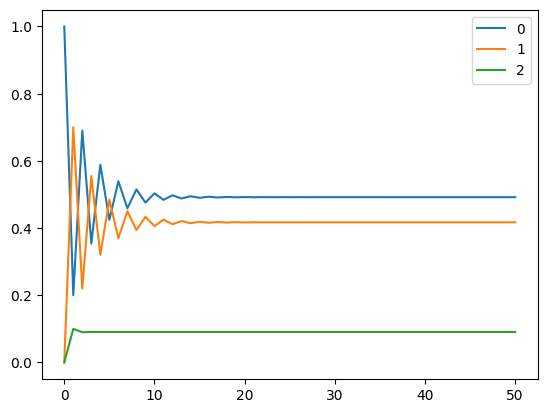

In [10]:
import numpy as np
import pandas as pd
from random import seed
from random import random
import matplotlib.pyplot as plt

P = np.array([[0.2, 0.7, 0.1],
              [0.9, 0.0, 0.1],
              [0.2, 0.8, 0.0]])

state=np.array([[1.0, 0.0, 0.0]])

stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0]]

for x in range(50):
    state=np.dot(state,P)
    print(state)
    stateHist=np.append(stateHist,state,axis=0)

dfDistrHist = pd.DataFrame(stateHist)

dfDistrHist.plot()
plt.show()


### Diagramas de estados

Primeramente, copia los archivos src/node.py y src/markovchain.py en tu directorio de trabajo.

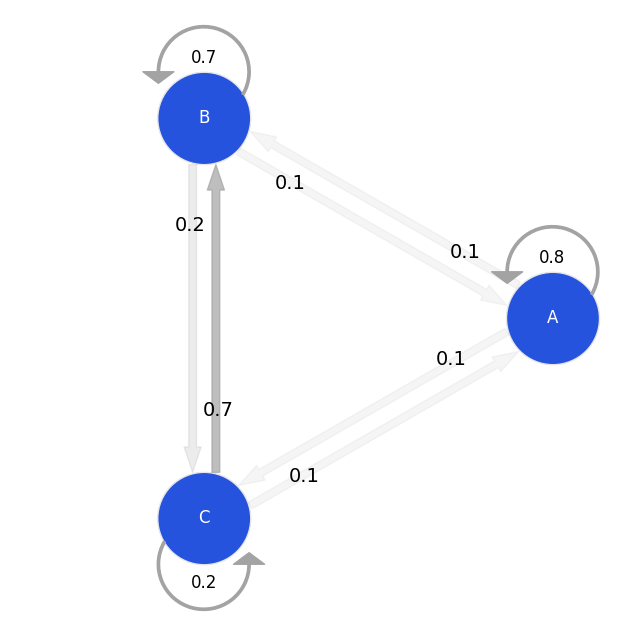

In [11]:
from markovchain import MarkovChain

# Creación de cadena de Markov de tres estados
P = np.array([
    [0.8, 0.1, 0.1],
    [0.1, 0.7, 0.2],
    [0.1, 0.7, 0.2],
])
mc = MarkovChain(P, ['A', 'B', 'C'])
mc.draw()

## Ejercicios

1. Una urna contiene dos bolas sin pintar. Se selecciona una bola al azar y se lanza una moneda. Si la bola elegida no está pintada y la moneda produce cara, pintamos la bola de rojo; si la moneda produce cruz, la pintamos de negro. Si la bola ya está pintada, entonces cambiamos el color de la bola de rojo a negro o de negro a rojo, independientemente de si la moneda produce cara o cruz. Modela el problema como una cadena de Markov y encuentre la matriz de probabilidades de transición.

2. El ascensor de un edificio con bajo y dos pisos realiza viajes de uno a otro piso. El piso en el que finaliza el viaje n-ésimo del ascensor sigue una cadena de Markov. Se sabe que la mitad de los viajes que parten del bajo se dirigen a cada uno de los otros dos pisos, mientras que si un viaje comienza en el primer piso, sólo el 25% de las veces finaliza en el segundo. Por último, si un trayecto
comienza en el segundo piso, siempre finaliza en el bajo. Se pide: a) Calcular la matriz de probabilidades de transición de la cadena; b) Dibujar el gráfico asociado; c) ¿Cuál es la probabilidad de que, a largo plazo, el ascensor se encuentre en cada uno de los tres pisos.

3. Hay tres empresas que venden conexión a Internet basada en fibra a los hogares de los clientes. Estas empresas llevan aquí bastante tiempo y los clientes también cambian de empresa según los siguientes datos: 1) El 10% de los clientes de Hathway cambiarán a ADN y el 10% a Excitel. 2) El 20% de los clientes de ADN se cambiarán a Hathway y el 20% a Excitel. 3) El 10% de los clientes de Excitel se pasarán a Hathway y el 20% a ADN. Dibija el diagrama de transición asociado y averigua el porcentaje de fidelidad que los clientes mantendrán con cada una de las empresas.
   
4. Hay tres empresas que venden software antivirus: Mcaffe, Quickheal y Kaspersky. A estas tres empresas les iba muy bien, pero una nueva empresa, Avira, entra en el mercado y diseña e implementa estrategias de marketing que demuestran que atraerá a: el 5% de los usuarios de KASPERSKEY, al 2% de la base de clientes de MCAFFE, el 6% de los usuarios de QUICK. Además, KASPERSKEY retiene al 92% de sus clientes, MCAFEE al 94%, QUICK el 90% y la nueva compañia retendrá al 97% de sus usuarios. Basándonos en esto, dibuja el diagrama de transición asociado y desarra un modelo para predecir la cuota de mercado.

5. La siguiente matriz de transición de probabilidades se ha tomado de los datos de las agencias de calificación crediticia como Standard & Poor, Moody's y Fitch en los sectores financieros e industriual. Esta matriz, describe las probabilidades de transición de que una determinada empresa, país, etc. permanezca en su estado actual, o pase a un nuevo estado. Basándonos en esto, dibuja el diagrama de treansición y desarra un modelo para predecir la evolución.
a.


In [12]:
P = np.array([[0.9193, 0.0746, 0.0048, 0.0008, 0.0004, 0.0000, 0.0000, 0.0000],
              [0.6400, 0.9181, 0.0676, 0.0060, 0.0006, 0.0012, 0.0003, 0.0000], 
              [0.0700, 0.0227, 0.9169, 0.0512, 0.0056, 0.0025, 0.0001, 0.0004], 
              [0.0400, 0.0270, 0.0556, 0.8788, 0.0483, 0.0102, 0.0017, 0.0024], 
              [0.0400, 0.0010, 0.0061, 0.0775, 0.8148, 0.0790, 0.0111, 0.0101], 
              [0.0000, 0.0010, 0.0028, 0.0046, 0.0695, 0.8280, 0.0396, 0.0545], 
              [0.1900, 0.0000, 0.0037, 0.0075, 0.0243, 0.1213, 0.6045, 0.2369], 
              [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000]])

6. En una comunidad hay 3 supermercados (S1, S2, S3) existe la movilidad de un cliente de uno a otro. El 1 de septiembre, ¼ de los clientes va al S1, 1/3 al S2 y 5/12 al S3 de un total de 10.000 personas. Cada mes el S1 retiene el 90% de sus clientes y pierde el 10% que se va al S2. Se averiguó que el S2 solo retiene el 5% y pierde el 85% que va a S1 y el resto se va a S3, el S3 retiene solo el 40%, pierde el 50% que va al S1 y el 10% va al S2. Calcula: a) La matriz de transición (representala); b) ¿Cuál es la proporción de clientes para los supermercados el 1 de noviembre?; c) Hallar el vector de probabilidad estable.

7. Supongamos una cola para comprar un billete en un mostrador de una línea aerea. Se sabe que: a) En un intervalo de un minuto, hay una probabilidad de 1/3 de que una persona se añada a la cola y una probabilidad de 2/3 de que nadie se agregue. Además, observemos, que en cualquier intervalo de un minuto nunca se agregará más de una persona a la cola. b) Si se está atendiendo a una persona en un intervalo, la probabilidad de que en ese mismo intervalo reciba el billete es de 3/8. Si es así, saldrá de la cola en el siguiente intervalo. c) Todas las probabilidades son independientes de lo que haya sucedido en intervalos anteriores. d) Una persona no puede ser atendida en el mismo intervalo en que llega a la cola. e)  No pueden ser atendidas más de una persona en un mismo intervalo. f) Como media para que no se congestiones la cola, se cerrará si hay 4 personas esperando en ella. Es decir, como mucho, nuestra cola puede tener 4 personas. Calcula La matriz de transición y representala. Hallar el vector de probabilidad estable.

## ejercicio 1

Matriz de probabilidades de transición:
0.0 0.5 0.5 0.0 0.0 0.0 
0.0 0.0 0.0 0.8 0.2 0.0 
0.0 0.0 0.0 0.8 0.0 0.2 
0.0 0.0 0.0 0.0 0.5 0.5 
0.0 0.0 0.0 1.0 0.0 0.0 
0.0 0.0 0.0 1.0 0.0 0.0 


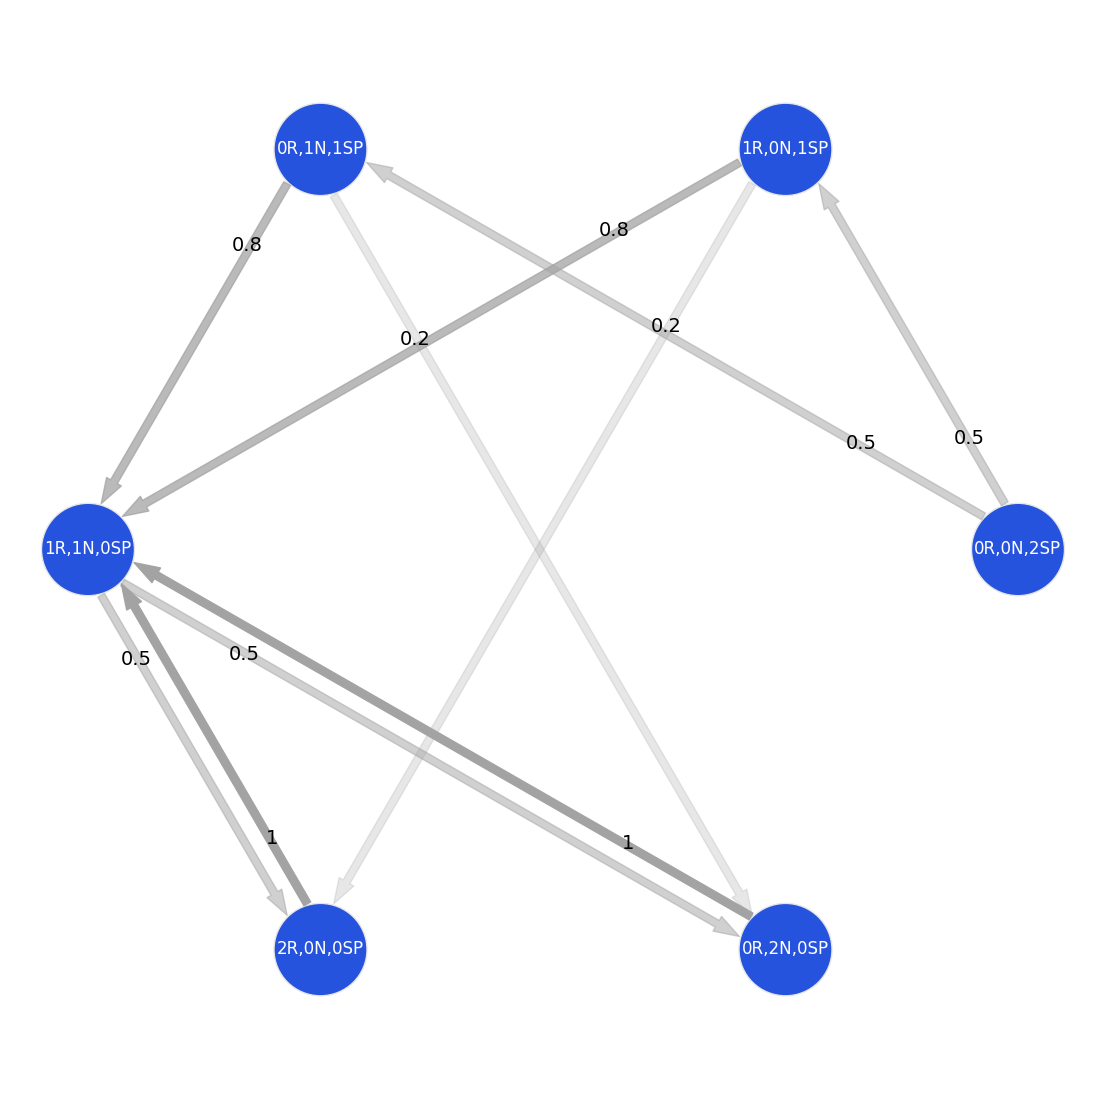


Distribución estacionaria:
Estado 0: 0.0000
Estado 1: 0.0000
Estado 2: 0.0000
Estado 3: 0.7500
Estado 4: 0.1250
Estado 5: 0.1250


In [51]:
def urna_bolas_sin_pintar():
    """
    Una urna contiene dos bolas sin pintar. Se selecciona una bola al azar y se lanza una moneda. Si la bola elegida no está pintada y la moneda produce cara, pintamos la bola de rojo; si la moneda produce cruz, la pintamos de negro. Si la bola ya está pintada, entonces cambiamos el color de la bola de rojo a negro o de negro a rojo, independientemente de si la moneda produce cara o cruz. Modela el problema como una cadena de Markov y encuentre la matriz de probabilidades de transición.

    """
    # Definimos los estados:
    # Estado 0: 0 bolas rojas, 0 bolas negras (2 sin pintar)
    # Estado 1: 1 bola roja, 0 bolas negras (1 sin pintar)
    # Estado 2: 0 bolas rojas, 1 bola negra (1 sin pintar)
    # Estado 3: 1 bola roja, 1 bola negra (0 sin pintar)
    # Estado 4: 2 bolas rojas, 0 bolas negras (0 sin pintar)
    # Estado 5: 0 bolas rojas, 2 bolas negras (0 sin pintar)
    
    # Matriz de transición: P[i,j] = probabilidad de pasar del estado i al estado j
    P = np.zeros((6, 6))
    
    # Desde estado 0 (0R, 0N, 2SP)
    # Probabilidad 1/2 de que salga cara en la moneda → pinta roja
    # Probabilidad 1/2 de que salga cruz en la moneda → pinta negra
    P[0, 1] = 0.5  # 0R,0N,2SP → 1R,0N,1SP
    P[0, 2] = 0.5  # 0R,0N,2SP → 0R,1N,1SP
    
    # Desde estado 1 (1R, 0N, 1SP)
    # Probabilidad 1/2 de elegir la bola roja → cambio a negra
    # Probabilidad 1/2 de elegir la bola sin pintar:
    #   * Probabilidad 1/2 de que salga cara → pinta roja
    #   * Probabilidad 1/2 de que salga cruz → pinta negra
    P[1, 3] = 0.5 * 1.0 + 0.5 * 0.5  # 1R,0N,1SP → 1R,1N,0SP (1/2 cambiar roja + 1/2 elegir SP y que salga cruz)
    P[1, 4] = 0.5 * 0.5              # 1R,0N,1SP → 2R,0N,0SP (1/2 elegir SP y que salga cara)
    
    # Desde estado 2 (0R, 1N, 1SP)
    # Probabilidad 1/2 de elegir la bola negra → cambio a roja
    # Probabilidad 1/2 de elegir la bola sin pintar:
    #   * Probabilidad 1/2 de que salga cara → pinta roja
    #   * Probabilidad 1/2 de que salga cruz → pinta negra
    P[2, 3] = 0.5 * 1.0 + 0.5 * 0.5  # 0R,1N,1SP → 1R,1N,0SP (1/2 cambiar negra + 1/2 elegir SP y que salga cara)
    P[2, 5] = 0.5 * 0.5              # 0R,1N,1SP → 0R,2N,0SP (1/2 elegir SP y que salga cruz)
    
    # Desde estado 3 (1R, 1N, 0SP)
    # Probabilidad 1/2 de elegir la bola roja → cambio a negra
    # Probabilidad 1/2 de elegir la bola negra → cambio a roja
    P[3, 5] = 0.5  # 1R,1N,0SP → 0R,2N,0SP (1/2 elegir roja y cambiar)
    P[3, 4] = 0.5  # 1R,1N,0SP → 2R,0N,0SP (1/2 elegir negra y cambiar)
    
    # Desde estado 4 (2R, 0N, 0SP)
    # Siempre se elige una bola roja → cambio a negra
    P[4, 3] = 1.0  # 2R,0N,0SP → 1R,1N,0SP
    
    # Desde estado 5 (0R, 2N, 0SP)
    # Siempre se elige una bola negra → cambio a roja
    P[5, 3] = 1.0  # 0R,2N,0SP → 1R,1N,0SP
    
    return P

# Calcular la matriz de transición
P = urna_bolas_sin_pintar()

# Imprimir matriz de transición
print("Matriz de probabilidades de transición:")
for i in range(6):
    for j in range(6):
        print(f"{P[i, j]:.1f}", end=" ")
    print()

# Dibujar el diagrama de la cadena de Markov
mc = MarkovChain(P, ['0R,0N,2SP', '1R,0N,1SP', '0R,1N,1SP', '1R,1N,0SP', '2R,0N,0SP', '0R,2N,0SP'])
mc.draw()

# Calcular la distribución estacionaria
def steady_state(P, steps=1000):
    """Calcula la distribución estacionaria de una matriz de transición."""
    # Empezamos con un vector de estado inicial arbitrario
    state = np.array([1, 0, 0, 0, 0, 0])
    
    # Iteramos hasta converger
    for _ in range(steps):
        state = np.dot(state, P)
    
    return state

# Calcular la distribución estacionaria
steady = steady_state(P)
print("\nDistribución estacionaria:")
for i, prob in enumerate(steady):
    print(f"Estado {i}: {prob:.4f}")



## ejercicio 2



a) Matriz de probabilidades de transición:
0.00 0.50 0.50 
0.75 0.00 0.25 
1.00 0.00 0.00 

b) Diagrama de la cadena de Markov:


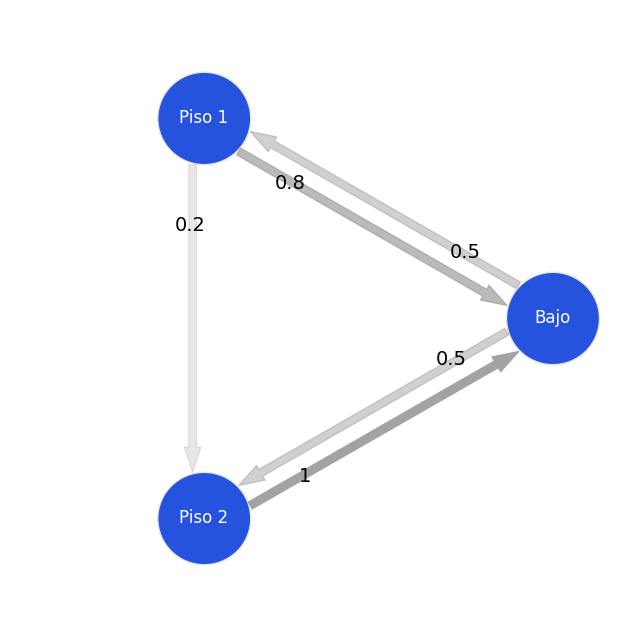


c) Probabilidad a largo plazo de que el ascensor se encuentre en cada piso:
Bajo: 0.4706
Piso 1: 0.2353
Piso 2: 0.2941

Verificación mediante resolución algebraica:
Bajo: 0.4706
Piso 1: 0.2353
Piso 2: 0.2941


In [ ]:
def ascensor_tres_pisos():
    """

    El ascensor de un edificio con bajo y dos pisos realiza viajes de uno a otro piso. El piso en el que finaliza el viaje n-ésimo del ascensor sigue una cadena de Markov. Se sabe que la mitad de los viajes que parten del bajo se dirigen a cada uno de los otros dos pisos, mientras que si un viaje comienza en el primer piso, sólo el 25% de las veces finaliza en el segundo. Por último, si un trayecto comienza en el segundo piso, siempre finaliza en el bajo. Se pide: 
    
    a) Calcular la matriz de probabilidades de transición de la cadena
    b) Dibujar el gráfico asociado
    c) Probabilidad a largo plazo de que el ascensor se encuentre en cada piso
    """
    # Definimos los estados:
    # Estado 0: Bajo (planta baja)
    # Estado 1: Piso 1
    # Estado 2: Piso 2
    
    # Matriz de transición: P[i,j] = probabilidad de pasar del estado i al estado j
    P = np.zeros((3, 3))
    
    # Desde Bajo (Estado 0)
    P[0, 0] = 0.0  # No se queda en el bajo
    P[0, 1] = 0.5  # 50% va al piso 1
    P[0, 2] = 0.5  # 50% va al piso 2
    
    # Desde Piso 1 (Estado 1)
    # El enunciado solo dice que el 25% va al piso 2, el resto debe repartirse
    # entre quedarse en el piso 1 o ir al bajo
    P[1, 0] = 0.75  # Asumimos que el resto va al bajo
    P[1, 1] = 0.0   # No se queda en el piso 1
    P[1, 2] = 0.25  # 25% va al piso 2
    
    # Desde Piso 2 (Estado 2)
    P[2, 0] = 1.0  # 100% va al bajo
    P[2, 1] = 0.0  # 0% va al piso 1
    P[2, 2] = 0.0  # No se queda en el piso 2
    
    return P

# Calcular la matriz de transición
P = ascensor_tres_pisos()

# Imprimir matriz de transición
print("a) Matriz de probabilidades de transición:")
for i in range(3):
    for j in range(3):
        print(f"{P[i, j]:.2f}", end=" ")
    print()

# Dibujar el diagrama de la cadena de Markov
print("\nb) Diagrama de la cadena de Markov:")
mc = MarkovChain(P, ['Bajo', 'Piso 1', 'Piso 2'])
mc.draw()

# Calcular la distribución estacionaria
def steady_state(P, steps=1000):
    """Calcula la distribución estacionaria de una matriz de transición."""
    # Empezamos con un vector de estado inicial arbitrario
    state = np.array([1, 0, 0])
    
    # Iteramos hasta converger
    for _ in range(steps):
        state = np.dot(state, P)
    
    return state

# Calcular la distribución estacionaria
steady = steady_state(P)
print("\nc) Probabilidad a largo plazo de que el ascensor se encuentre en cada piso:")
for i, prob in enumerate(['Bajo', 'Piso 1', 'Piso 2']):
    print(f"{prob}: {steady[i]:.4f}")

# Método alternativo: resolución de sistema de ecuaciones
# Para una distribución estacionaria π, debe cumplirse π = π·P
# π₀ = π₀·P₀₀ + π₁·P₁₀ + π₂·P₂₀
# π₁ = π₀·P₀₁ + π₁·P₁₁ + π₂·P₂₁
# π₂ = π₀·P₀₂ + π₁·P₁₂ + π₂·P₂₂
# π₀ + π₁ + π₂ = 1

# Sistema de ecuaciones:
# π₀ = 0·π₀ + 0.75·π₁ + 1·π₂
# π₁ = 0.5·π₀ + 0·π₁ + 0·π₂
# π₂ = 0.5·π₀ + 0.25·π₁ + 0·π₂
# π₀ + π₁ + π₂ = 1

# Resolviendo algebraicamente (solo para verificar):
A = np.array([
    [1, -0.75, -1],
    [-0.5, 1, 0],
    [-0.5, -0.25, 1],
    [1, 1, 1]
])
b = np.array([0, 0, 0, 1])

# El sistema es sobredeterminado (4 ecuaciones, 3 incógnitas)
# Usaremos mínimos cuadrados para resolverlo
x, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

print("\nVerificación mediante resolución algebraica:")
for i, prob in enumerate(['Bajo', 'Piso 1', 'Piso 2']):
    print(f"{prob}: {x[i]:.4f}")



## ejercicio 3



Matriz de probabilidades de transición:
0.8 0.1 0.1 
0.2 0.6 0.2 
0.1 0.2 0.7 

Porcentajes de fidelidad:
Hathway: 80.0%
ADN: 60.0%
Excitel: 70.0%


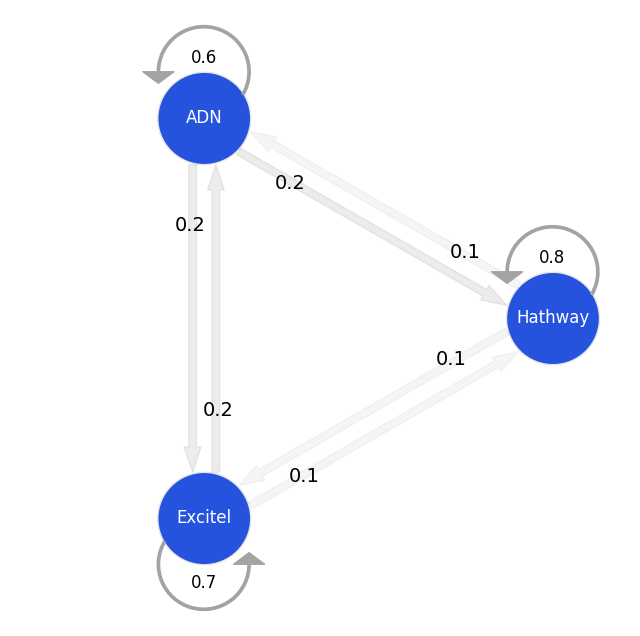


Distribución estacionaria (cuota de mercado a largo plazo):
Hathway: 42.11%
ADN: 26.32%
Excitel: 31.58%


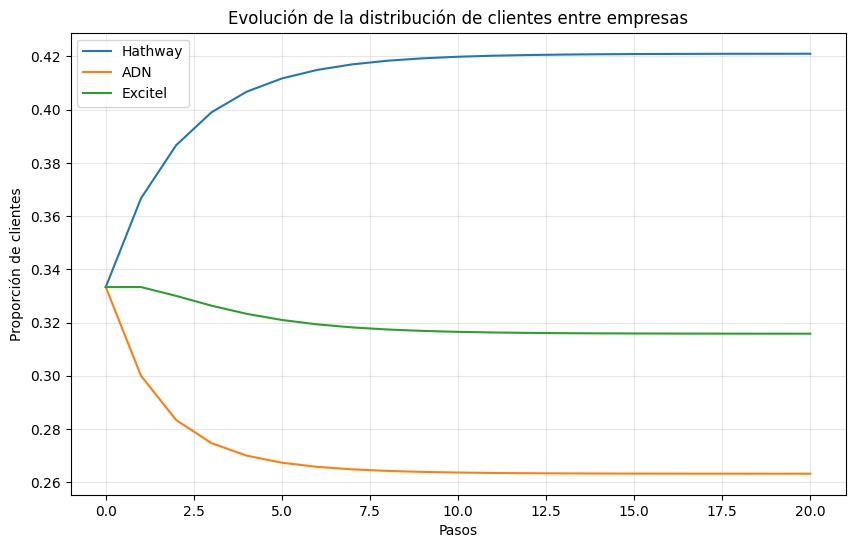

In [ ]:
def empresas_internet():
    """
    Hay tres empresas que venden conexión a Internet basada en fibra a los hogares 
    de los clientes. Estas empresas llevan aquí bastante tiempo y los clientes 
    también cambian de empresa según los siguientes datos:
    
    1) El 10% de los clientes de Hathway cambiarán a ADN y el 10% a Excitel.
    2) El 20% de los clientes de ADN se cambiarán a Hathway y el 20% a Excitel.
    3) El 10% de los clientes de Excitel se pasarán a Hathway y el 20% a ADN.
    
    Se pide dibujar el diagrama de transición asociado y averiguar el porcentaje 
    de fidelidad que los clientes mantendrán con cada una de las empresas.
    """
    # Definimos los estados:
    # Estado 0: Hathway
    # Estado 1: ADN
    # Estado 2: Excitel
    
    # Matriz de transición: P[i,j] = probabilidad de pasar del estado i al estado j
    P = np.zeros((3, 3))
    
    # Hathway (Estado 0)
    P[0, 0] = 0.8  # 80% se queda (fidelidad)
    P[0, 1] = 0.1  # 10% cambia a ADN
    P[0, 2] = 0.1  # 10% cambia a Excitel
    
    # ADN (Estado 1)
    P[1, 0] = 0.2  # 20% cambia a Hathway
    P[1, 1] = 0.6  # 60% se queda (fidelidad)
    P[1, 2] = 0.2  # 20% cambia a Excitel
    
    # Excitel (Estado 2)
    P[2, 0] = 0.1  # 10% cambia a Hathway
    P[2, 1] = 0.2  # 20% cambia a ADN
    P[2, 2] = 0.7  # 70% se queda (fidelidad)
    
    return P

# Calcular la matriz de transición
P = empresas_internet()

# Imprimir matriz de transición y porcentajes de fidelidad
print("Matriz de probabilidades de transición:")
for i in range(3):
    for j in range(3):
        print(f"{P[i, j]:.1f}", end=" ")
    print()

print("\nPorcentajes de fidelidad:")
empresas = ["Hathway", "ADN", "Excitel"]
for i, empresa in enumerate(empresas):
    print(f"{empresa}: {P[i, i] * 100:.1f}%")

# Dibujar el diagrama de la cadena de Markov
mc = MarkovChain(P, empresas)
mc.draw()

# Calcular la distribución estacionaria
def steady_state(P, steps=1000):
    """Calcula la distribución estacionaria de una matriz de transición."""
    # Empezamos con un vector de estado inicial arbitrario
    state = np.array([1/3, 1/3, 1/3])
    
    # Iteramos hasta converger
    for _ in range(steps):
        state = np.dot(state, P)
    
    return state

# Calcular la distribución estacionaria
steady = steady_state(P)
print("\nDistribución estacionaria (cuota de mercado a largo plazo):")
for i, empresa in enumerate(empresas):
    print(f"{empresa}: {steady[i]*100:.2f}%")

# Visualizar evolución temporal
num_steps = 20
# Asumimos distribución inicial igual
initial_state = np.array([1/3, 1/3, 1/3])
states = [initial_state]

# Calcular estados sucesivos
state = initial_state
for _ in range(num_steps):
    state = np.dot(state, P)
    states.append(state.copy())

# Convertir a dataframe para graficar fácilmente
import pandas as pd
df = pd.DataFrame(states, columns=empresas)

# Graficar evolución
plt.figure(figsize=(10, 6))
for empresa in empresas:
    plt.plot(df[empresa], label=empresa)
plt.xlabel('Pasos')
plt.ylabel('Proporción de clientes')
plt.title('Evolución de la distribución de clientes entre empresas')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



## ejercicio 4



Matriz de probabilidades de transición:
0.94 0.02 0.02 0.02 
0.02 0.90 0.02 0.06 
0.01 0.01 0.92 0.05 
0.01 0.01 0.01 0.97 

Porcentajes de fidelidad:
Mcaffe: 94.0%
Quickheal: 90.0%
Kaspersky: 92.0%
Avira: 97.0%


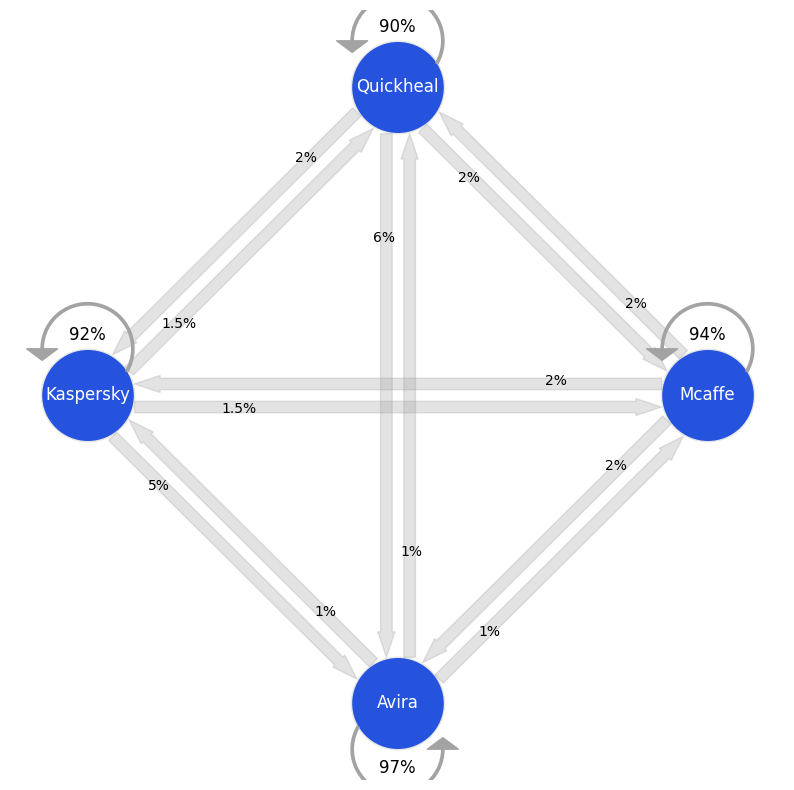


Distribución estacionaria (cuota de mercado a largo plazo):
Mcaffe: 16.91%
Quickheal: 11.28%
Kaspersky: 14.24%
Avira: 57.57%


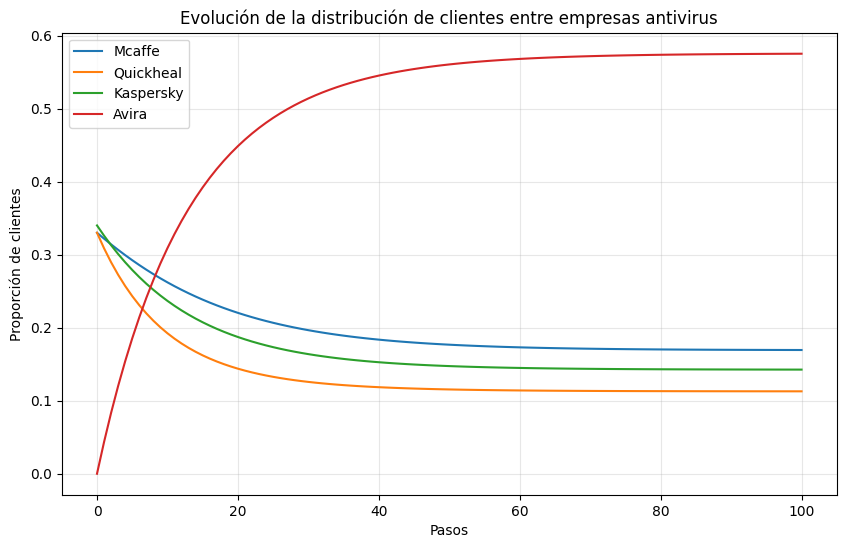

In [63]:
def empresas_antivirus():
    """
    Hay tres empresas que venden software antivirus: Mcaffe, Quickheal y Kaspersky. A estas 
    tres empresas les iba muy bien, pero una nueva empresa, Avira, entra en el mercado y 
    diseña e implementa estrategias de marketing que demuestran que atraerá a:
    
    - El 5% de los usuarios de KASPERSKEY
    - Al 2% de la base de clientes de MCAFFE
    - El 6% de los usuarios de QUICK
    
    Además, KASPERSKEY retiene al 92% de sus clientes, MCAFEE al 94%, QUICK el 90% 
    y la nueva compañia retendrá al 97% de sus usuarios.
    
    Se pide dibujar el diagrama de transición asociado y desarrollar un modelo para 
    predecir la cuota de mercado.
    """
    # Definimos los estados:
    # Estado 0: Mcaffe
    # Estado 1: Quickheal
    # Estado 2: Kaspersky
    # Estado 3: Avira
    
    # Matriz de transición: P[i,j] = probabilidad de pasar del estado i al estado j
    P = np.zeros((4, 4))
    
    # Mcaffe (Estado 0)
    P[0, 0] = 0.94  # 94% se queda (fidelidad)
    P[0, 3] = 0.02  # 2% se va a Avira
    # El 4% restante se divide entre Quickheal y Kaspersky
    P[0, 1] = 0.02  # Asumimos 2% a Quickheal
    P[0, 2] = 0.02  # Asumimos 2% a Kaspersky
    
    # Quickheal (Estado 1)
    P[1, 1] = 0.90  # 90% se queda (fidelidad)
    P[1, 3] = 0.06  # 6% se va a Avira
    # El 4% restante se divide entre Mcaffe y Kaspersky
    P[1, 0] = 0.02  # Asumimos 2% a Mcaffe
    P[1, 2] = 0.02  # Asumimos 2% a Kaspersky
    
    # Kaspersky (Estado 2)
    P[2, 2] = 0.92  # 92% se queda (fidelidad)
    P[2, 3] = 0.05  # 5% se va a Avira
    # El 3% restante se divide entre Mcaffe y Quickheal
    P[2, 0] = 0.015  # Asumimos 1.5% a Mcaffe
    P[2, 1] = 0.015  # Asumimos 1.5% a Quickheal
    
    # Avira (Estado 3)
    P[3, 3] = 0.97  # 97% se queda (fidelidad)
    # El 3% restante se divide entre las tres empresas existentes
    P[3, 0] = 0.01  # Asumimos 1% a Mcaffe
    P[3, 1] = 0.01  # Asumimos 1% a Quickheal
    P[3, 2] = 0.01  # Asumimos 1% a Kaspersky
    
    return P

# Calcular la matriz de transición
P = empresas_antivirus()

# Imprimir matriz de transición y porcentajes de fidelidad
print("Matriz de probabilidades de transición:")
for i in range(4):
    for j in range(4):
        # Solo mostrar valores > 0
        if P[i, j] > 0:
            print(f"{P[i, j]:.2f}", end=" ")
        else:
            print("·", end=" ")  # Usar un punto para indicar cero
    print()

print("\nPorcentajes de fidelidad:")
empresas = ["Mcaffe", "Quickheal", "Kaspersky", "Avira"]
for i, empresa in enumerate(empresas):
    print(f"{empresa}: {P[i, i] * 100:.1f}%")

# Crear una versión filtrada de la matriz para visualización
# Eliminar transiciones con probabilidad muy pequeña
umbral = 0.01  # Solo mostrar transiciones con probabilidad > 1%
P_visual = P.copy()
P_visual[P_visual < umbral] = 0

# Función personalizada para determinar la transparencia de las flechas
def transparency_func(p):

        return max(0.3, p * 1.2)  # Hacer más visibles las probabilidades pequeñas

# Dibujar el diagrama de la cadena de Markov
mc = MarkovChain(
    P_visual, 
    empresas, 
    percentages=True,  # Mostrar probabilidades como porcentajes
    annotate=True,     # Mostrar anotaciones
    arrow_width=0.15,  # Ancho de las flechas
    transparency_func=transparency_func,  # Función personalizada de transparencia
    fontsize=10       # Tamaño de letra para las probabilidades
)
mc.draw()

# Calcular la distribución estacionaria
def steady_state(P, steps=1000):
    """Calcula la distribución estacionaria de una matriz de transición."""
    # Empezamos con un vector de estado inicial arbitrario
    # Asumimos que inicialmente Avira no tiene clientes
    state = np.array([0.33, 0.33, 0.34, 0.0])
    
    # Iteramos hasta converger
    for _ in range(steps):
        state = np.dot(state, P)
    
    return state

# Calcular la distribución estacionaria
steady = steady_state(P)
print("\nDistribución estacionaria (cuota de mercado a largo plazo):")
for i, empresa in enumerate(empresas):
    print(f"{empresa}: {steady[i]*100:.2f}%")

# Visualizar evolución temporal
num_steps = 100
# Asumimos distribución inicial sin Avira
initial_state = np.array([0.33, 0.33, 0.34, 0.0])
states = [initial_state]

# Calcular estados sucesivos
state = initial_state
for _ in range(num_steps):
    state = np.dot(state, P)
    states.append(state.copy())

# Convertir a dataframe para graficar fácilmente
import pandas as pd
df = pd.DataFrame(states, columns=empresas)

# Graficar evolución
plt.figure(figsize=(10, 6))
for empresa in empresas:
    plt.plot(df[empresa], label=empresa)
plt.xlabel('Pasos')
plt.ylabel('Proporción de clientes')
plt.title('Evolución de la distribución de clientes entre empresas antivirus')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



## ejercicio 5



Suma de filas (deben ser aproximadamente 1):
AAA: 0.9999
AA: 1.0578
A: 1.0064
BBB: 1.0280
BB: 1.0036
B: 1.0000
CCC: 1.0172
Default: 1.0000

Diagrama de la cadena de Markov:


<Figure size 800x600 with 0 Axes>

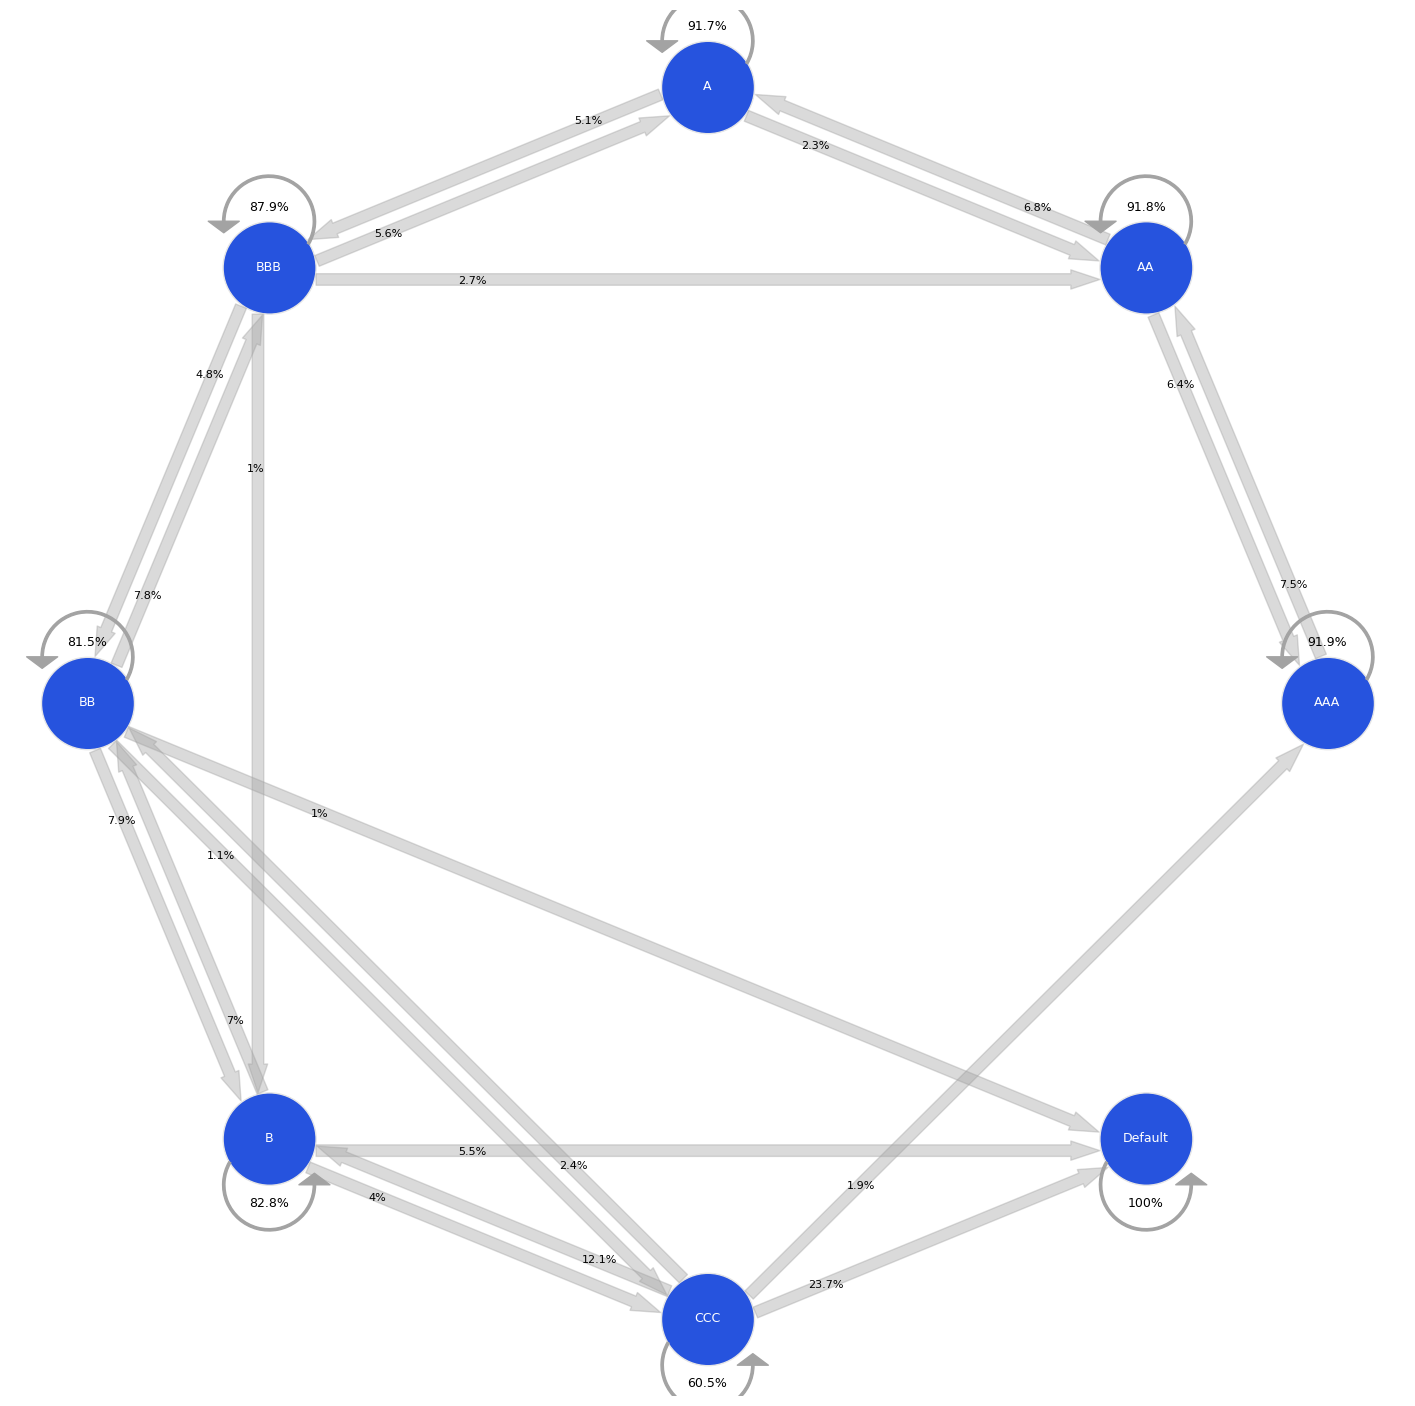


Distribución estacionaria (probabilidades a largo plazo):
AAA: 135365237.51%
AA: 174543450.38%
A: 185786263.24%
BBB: 101928832.96%
BB: 41005236.03%
B: 29209396.37%
CCC: 4507357.31%
Default: 208314208.05%


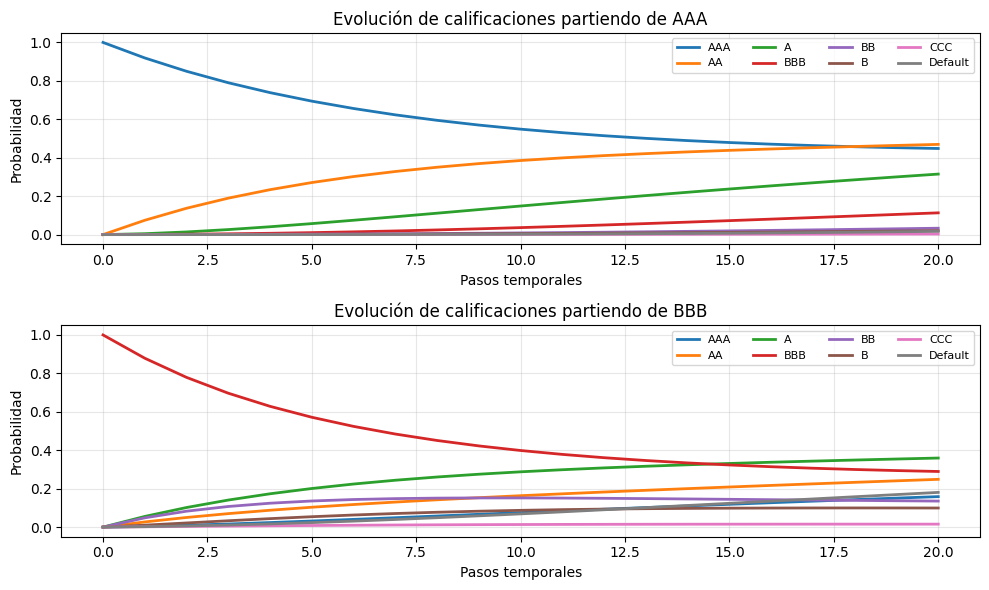


Probabilidad de default después de n años:
Rating	1 años	3 años	5 años	10 años	
AAA	0.00%	0.00%	0.02%	0.21%	
AA	0.00%	0.05%	0.18%	0.87%	
A	0.04%	0.22%	0.56%	2.19%	
BBB	0.24%	1.07%	2.34%	6.89%	
BB	1.01%	4.43%	8.74%	19.76%	
B	5.45%	16.25%	25.59%	42.16%	
CCC	23.69%	48.48%	59.72%	71.00%	


In [64]:
def analisis_calificaciones_crediticias():
    """
    Analiza la matriz de transición de probabilidades tomada de los datos de las 
    agencias de calificación crediticia como Standard & Poor, Moody's y Fitch 
    en los sectores financieros e industrial. Esta matriz describe las probabilidades 
    de transición de que una determinada empresa, país, etc. permanezca en su estado 
    actual, o pase a un nuevo estado.

    """
    # Matriz de transición dada en el ejercicio
    P = np.array([
        [0.9193, 0.0746, 0.0048, 0.0008, 0.0004, 0.0000, 0.0000, 0.0000],
        [0.0640, 0.9181, 0.0676, 0.0060, 0.0006, 0.0012, 0.0003, 0.0000],
        [0.0070, 0.0227, 0.9169, 0.0512, 0.0056, 0.0025, 0.0001, 0.0004],
        [0.0040, 0.0270, 0.0556, 0.8788, 0.0483, 0.0102, 0.0017, 0.0024],
        [0.0040, 0.0010, 0.0061, 0.0775, 0.8148, 0.0790, 0.0111, 0.0101],
        [0.0000, 0.0010, 0.0028, 0.0046, 0.0695, 0.8280, 0.0396, 0.0545],
        [0.0190, 0.0000, 0.0037, 0.0075, 0.0243, 0.1213, 0.6045, 0.2369],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000]
    ])
    
    return P

# Matriz de calificaciones crediticias
P = analisis_calificaciones_crediticias()

# Etiquetas para los estados (calificaciones crediticias)
calificaciones = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'Default']

# Verificar que las filas suman 1 (cada fila debe ser una distribución de probabilidad)
row_sums = P.sum(axis=1)
print("Suma de filas (deben ser aproximadamente 1):")
for i, sum_val in enumerate(row_sums):
    print(f"{calificaciones[i]}: {sum_val:.4f}")

# Filtrar transiciones muy pequeñas para mejorar la visualización
# Crear una copia de P para modificarla solo para la visualización
P_visual = P.copy()
umbral = 0.01  # Solo mostrar transiciones con probabilidad mayor a 1%
P_visual[P_visual < umbral] = 0

# Función de transparencia personalizada para hacer más visibles las líneas
def transparency_func(p):
    # Escalar las probabilidades para que sean más visibles
    # Las probabilidades pequeñas tendrán al menos 0.4 de opacidad
    return max(0.4, p)

plt.figure(figsize=(8, 6))


print("\nDiagrama de la cadena de Markov:")
mc = MarkovChain(
    P_visual,
    calificaciones,
    node_radius=0.6,  # Reducido de 0.8 a 0.6 para hacer los nodos más pequeños
    annotate=True,  # Activar anotaciones para ver las probabilidades
    percentages=True,  # Mostrar probabilidades como porcentajes
    arrow_width=0.15,  # Ajustado a un valor intermedio (era 0.2)
    arrow_head_width=0.25,  # Ajustado a un valor intermedio (era 0.3) 
    transparency_func=transparency_func,  # Función personalizada para la transparencia
    fontsize=8,  # Reducido de 10 a 8 para texto más pequeño
    node_fontsize=9  # Tamaño reducido para las etiquetas de los nodos
)
mc.draw()


# Calcular la distribución estacionaria
def steady_state(P, steps=1000):
    """Calcula la distribución estacionaria de una matriz de transición."""
    # Empezamos con un vector de estado inicial uniforme
    state = np.ones(P.shape[0]) / P.shape[0]
    
    # Iteramos hasta converger
    for _ in range(steps):
        state = np.dot(state, P)
    
    return state

# Calcular la distribución estacionaria
steady = steady_state(P)
print("\nDistribución estacionaria (probabilidades a largo plazo):")
for i, cal in enumerate(calificaciones):
    print(f"{cal}: {steady[i]*100:.2f}%")

# Predecir la evolución para diferentes calificaciones iniciales
def predict_evolution(P, initial_state, steps=20):
    """Predice la evolución de las calificaciones dado un estado inicial."""
    states = [initial_state]
    state = initial_state
    
    for _ in range(steps):
        state = np.dot(state, P)
        states.append(state.copy())
    
    return states

# Predecir evolución desde AAA
initial_AAA = np.zeros(8)
initial_AAA[0] = 1.0  # 100% en AAA
evolution_AAA = predict_evolution(P, initial_AAA)

# Predecir evolución desde BBB
initial_BBB = np.zeros(8)
initial_BBB[3] = 1.0  # 100% en BBB
evolution_BBB = predict_evolution(P, initial_BBB)

# Visualizar evoluciones con tamaño reducido
plt.figure(figsize=(10, 6))  # Reducido de (15, 10)

# Gráfico para evolución desde AAA
plt.subplot(2, 1, 1)
df_AAA = pd.DataFrame(evolution_AAA, columns=calificaciones)
for cal in calificaciones:
    plt.plot(df_AAA[cal], label=cal, linewidth=2)  # Aumentar grosor de líneas
plt.xlabel('Pasos temporales')
plt.ylabel('Probabilidad')
plt.title('Evolución de calificaciones partiendo de AAA')
plt.legend(fontsize=8, ncol=4)  # Leyenda más compacta en 4 columnas
plt.grid(True, alpha=0.3)

# Gráfico para evolución desde BBB
plt.subplot(2, 1, 2)
df_BBB = pd.DataFrame(evolution_BBB, columns=calificaciones)
for cal in calificaciones:
    plt.plot(df_BBB[cal], label=cal, linewidth=2)  # Aumentar grosor de líneas
plt.xlabel('Pasos temporales')
plt.ylabel('Probabilidad')
plt.title('Evolución de calificaciones partiendo de BBB')
plt.legend(fontsize=8, ncol=4)  # Leyenda más compacta en 4 columnas
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Probabilidad de default después de n años
def prob_default_after_n_years(P, initial_rating, n):
    """Calcula la probabilidad de default después de n años."""
    initial_state = np.zeros(8)
    initial_state[initial_rating] = 1.0
    
    state = initial_state
    for _ in range(n):
        state = np.dot(state, P)
    
    return state[-1]  # La última posición corresponde al default

# Calcular probabilidades de default para diferentes calificaciones y plazos
plazos = [1, 3, 5, 10]
print("\nProbabilidad de default después de n años:")
print("Rating\t", end="")
for n in plazos:
    print(f"{n} años\t", end="")
print()

for i, cal in enumerate(calificaciones[:-1]):  # Excluimos Default
    print(f"{cal}\t", end="")
    for n in plazos:
        prob = prob_default_after_n_years(P, i, n)
        print(f"{prob*100:.2f}%\t", end="")
    print()



## ejercicio 6



a) Matriz de probabilidades de transición:
0.90 0.10 0.00 
0.85 0.05 0.10 
0.50 0.10 0.40 


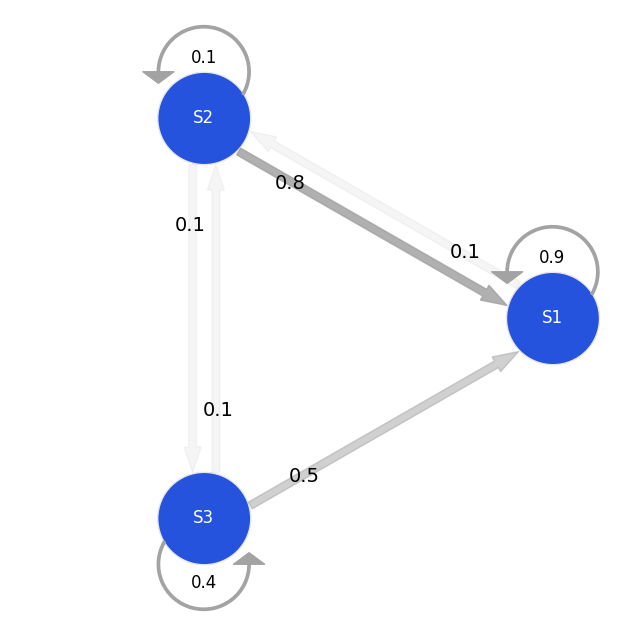


b) Proporción de clientes para los supermercados el 1 de noviembre:
S1: 0.8158 (8158 clientes)
S2: 0.0958 (958 clientes)
S3: 0.0883 (883 clientes)

c) Vector de probabilidad estable:
S1: 0.8889 (8889 clientes)
S2: 0.0952 (952 clientes)
S3: 0.0159 (159 clientes)


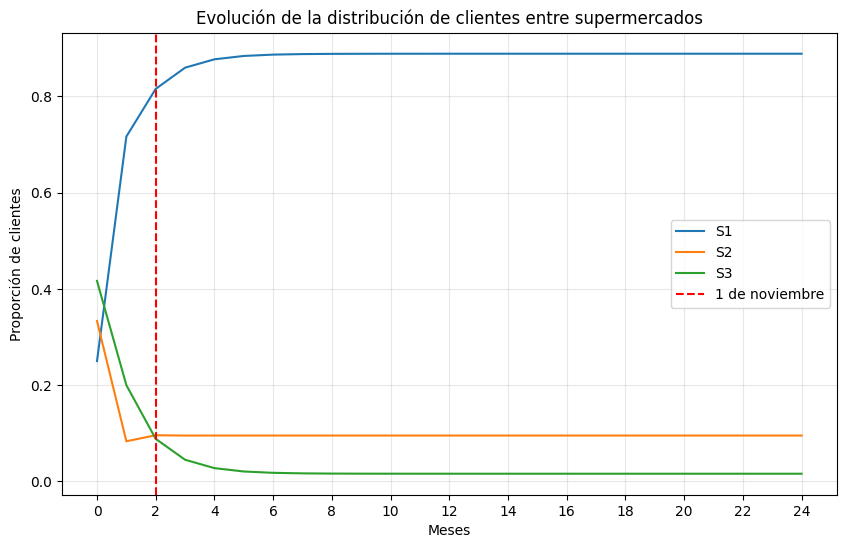

In [65]:
def supermercados_clientes():
    """
    En una comunidad hay 3 supermercados (S1, S2, S3) existe la movilidad de un cliente 
    de uno a otro. El 1 de septiembre, ¼ de los clientes va al S1, 1/3 al S2 y 5/12 al S3 
    de un total de 10.000 personas.
    
    Cada mes el S1 retiene el 90% de sus clientes y pierde el 10% que se va al S2.
    Se averiguó que el S2 solo retiene el 5% y pierde el 85% que va a S1 y el resto 
    se va a S3, el S3 retiene solo el 40%, pierde el 50% que va al S1 y el 10% va al S2.
    
    a) Matriz de transición (representarla)
    b) Proporción de clientes para los supermercados el 1 de noviembre
    c) Vector de probabilidad estable
    """
    # Definimos los estados:
    # Estado 0: Supermercado S1
    # Estado 1: Supermercado S2
    # Estado 2: Supermercado S3
    
    # Matriz de transición: P[i,j] = probabilidad de pasar del estado i al estado j
    P = np.zeros((3, 3))
    
    # S1 (Estado 0)
    P[0, 0] = 0.9  # 90% se queda
    P[0, 1] = 0.1  # 10% se va a S2
    P[0, 2] = 0.0  # 0% se va a S3
    
    # S2 (Estado 1)
    P[1, 0] = 0.85  # 85% se va a S1
    P[1, 1] = 0.05  # 5% se queda
    P[1, 2] = 0.10  # 10% se va a S3
    
    # S3 (Estado 2)
    P[2, 0] = 0.5  # 50% se va a S1
    P[2, 1] = 0.1  # 10% se va a S2
    P[2, 2] = 0.4  # 40% se queda
    
    return P

# Calcular la matriz de transición
P = supermercados_clientes()

# Distribución inicial (1 de septiembre)
initial_state = np.array([1/4, 1/3, 5/12])

# a) Imprimir matriz de transición
print("a) Matriz de probabilidades de transición:")
for i in range(3):
    for j in range(3):
        print(f"{P[i, j]:.2f}", end=" ")
    print()

# Dibujar el diagrama de la cadena de Markov
supermercados = ['S1', 'S2', 'S3']
mc = MarkovChain(P, supermercados)
mc.draw()

# b) Calcular la proporción de clientes el 1 de noviembre
# Septiembre -> Octubre -> Noviembre = 2 transiciones
state_nov = initial_state.copy()
for _ in range(2):
    state_nov = np.dot(state_nov, P)

print("\nb) Proporción de clientes para los supermercados el 1 de noviembre:")
for i, super in enumerate(supermercados):
    clientes = state_nov[i] * 10000  # Total de 10,000 clientes
    print(f"{super}: {state_nov[i]:.4f} ({clientes:.0f} clientes)")

# c) Calcular el vector de probabilidad estable
def steady_state(P, steps=1000):
    """Calcula la distribución estacionaria de una matriz de transición."""
    # Empezamos con la distribución inicial dada
    state = initial_state.copy()
    
    # Iteramos hasta converger
    for _ in range(steps):
        state = np.dot(state, P)
    
    return state

# Calcular la distribución estacionaria
steady = steady_state(P)
print("\nc) Vector de probabilidad estable:")
for i, super in enumerate(supermercados):
    clientes = steady[i] * 10000  # Total de 10,000 clientes
    print(f"{super}: {steady[i]:.4f} ({clientes:.0f} clientes)")

# Visualizar evolución temporal
num_steps = 24  # 2 años
states = [initial_state]

# Calcular estados sucesivos
state = initial_state.copy()
for _ in range(num_steps):
    state = np.dot(state, P)
    states.append(state.copy())

df = pd.DataFrame(states, columns=supermercados)

# Graficar evolución
plt.figure(figsize=(10, 6))
for i, super in enumerate(supermercados):
    plt.plot(df[super], label=super)
plt.xlabel('Meses')
plt.ylabel('Proporción de clientes')
plt.title('Evolución de la distribución de clientes entre supermercados')
plt.axvline(x=2, color='r', linestyle='--', label='1 de noviembre')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(0, num_steps+1, 2))
plt.show()



## ejercicio 7



a) Matriz de probabilidades de transición:
0.6667	0.3333	0.0000	0.0000	0.0000	
0.2500	0.5417	0.2083	0.0000	0.0000	
0.0000	0.2500	0.5417	0.2083	0.0000	
0.0000	0.0000	0.2500	0.5417	0.2083	
0.0000	0.0000	0.0000	0.3750	0.6250	

Suma de filas (deben ser 1):
Estado 0: 1.0000
Estado 1: 1.0000
Estado 2: 1.0000
Estado 3: 1.0000
Estado 4: 1.0000


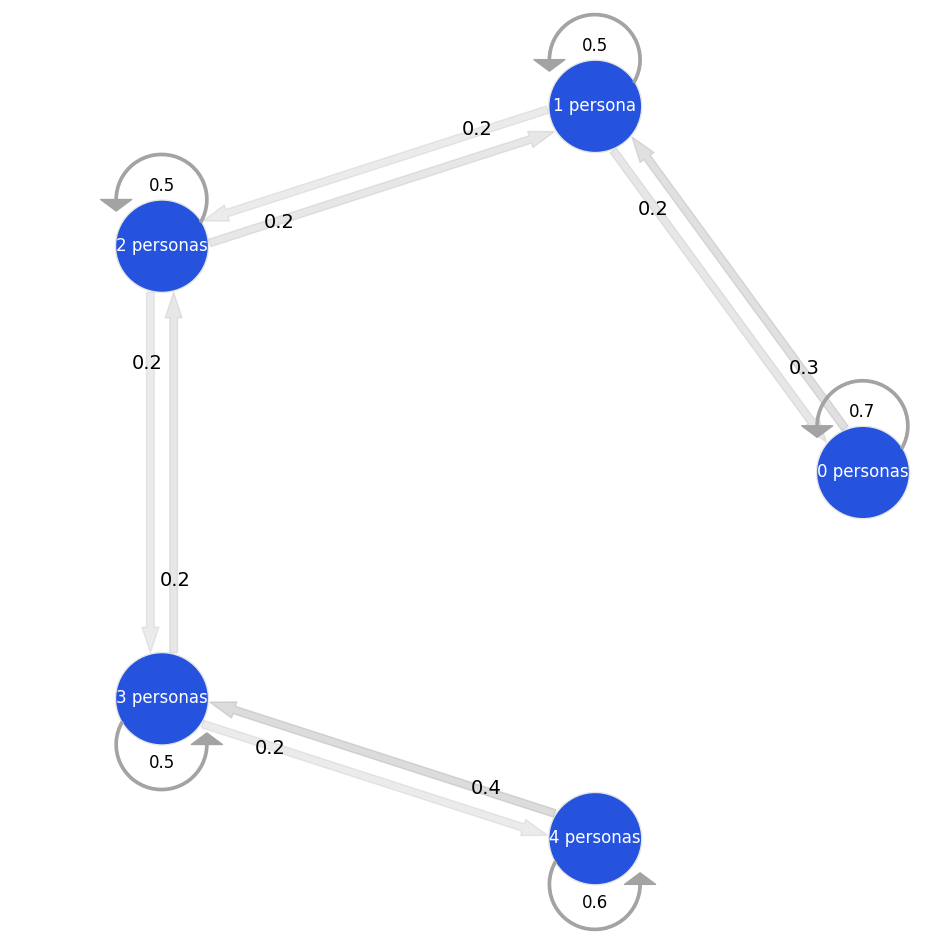


b) Vector de probabilidad estable:
0 personas: 0.2047
1 persona: 0.2730
2 personas: 0.2275
3 personas: 0.1896
4 personas: 0.1053

Verificación mediante resolución algebraica:
0 personas: 0.2047
1 persona: 0.2730
2 personas: 0.2275
3 personas: 0.1896
4 personas: 0.1053


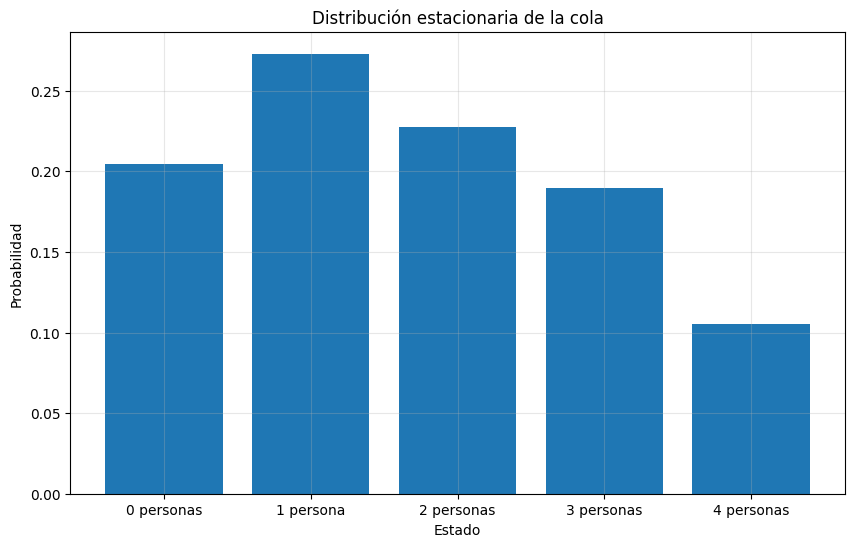


Métricas de rendimiento del sistema de colas:
Longitud media de la cola: 1.7178 personas
Probabilidad de cola vacía: 0.2047
Probabilidad de cola llena: 0.1053


In [66]:
def cola_ascensor():
    """
    Supongamos una cola para comprar un billete en un mostrador de una línea aérea. Se sabe que:
    
    a) En un intervalo de un minuto, hay una probabilidad de 1/3 de que una persona 
       se añada a la cola y una probabilidad de 2/3 de que nadie se agregue. Además, 
       observemos, que en cualquier intervalo de un minuto nunca se agregará más de 
       una persona a la cola.
    
    b) Si se está atendiendo a una persona en un intervalo, la probabilidad de que 
       en ese mismo intervalo reciba el billete es de 3/8. Si es así, saldrá de la 
       cola en el siguiente intervalo.
    
    c) Todas las probabilidades son independientes de lo que haya sucedido en 
       intervalos anteriores.
    
    d) Una persona no puede ser atendida en el mismo intervalo en que llega a la cola.
    
    e) No pueden ser atendidas más de una persona en un mismo intervalo.
    
    f) Como media para que no se congestiones la cola, se cerrará si hay 4 personas 
       esperando en ella. Es decir, como mucho, nuestra cola puede tener 4 personas.
    
    Se pide:
    a) Calcular la matriz de transición y representarla.
    b) Hallar el vector de probabilidad estable.
    """
    # Definimos los estados como el número de personas en la cola:
    # Estado 0: 0 personas en la cola
    # Estado 1: 1 persona en la cola
    # Estado 2: 2 personas en la cola
    # Estado 3: 3 personas en la cola
    # Estado 4: 4 personas en la cola (cola cerrada)
    
    # Matriz de transición: P[i,j] = probabilidad de pasar del estado i al estado j
    P = np.zeros((5, 5))
    
    # Para el estado 0 (0 personas en la cola)
    # - Con prob 1/3 llega una persona -> estado 1
    # - Con prob 2/3 no llega nadie -> estado 0
    P[0, 0] = 2/3
    P[0, 1] = 1/3
    
    # Para el estado 1 (1 persona en la cola)
    # - Con prob 3/8 la persona es atendida
    #   - Si nadie llega (prob 2/3) -> estado 0
    #   - Si llega alguien (prob 1/3) -> estado 1
    # - Con prob 5/8 la persona no es atendida
    #   - Si nadie llega (prob 2/3) -> estado 1
    #   - Si llega alguien (prob 1/3) -> estado 2
    P[1, 0] = (3/8) * (2/3)  # Atendido y nadie llega
    P[1, 1] = (3/8) * (1/3) + (5/8) * (2/3)  # (Atendido y llega uno) o (no atendido y nadie llega)
    P[1, 2] = (5/8) * (1/3)  # No atendido y llega uno
    
    # Para el estado 2 (2 personas en la cola)
    # - Con prob 3/8 la primera persona es atendida
    #   - Si nadie llega (prob 2/3) -> estado 1
    #   - Si llega alguien (prob 1/3) -> estado 2
    # - Con prob 5/8 la primera persona no es atendida
    #   - Si nadie llega (prob 2/3) -> estado 2
    #   - Si llega alguien (prob 1/3) -> estado 3
    P[2, 1] = (3/8) * (2/3)  # Atendido y nadie llega
    P[2, 2] = (3/8) * (1/3) + (5/8) * (2/3)  # (Atendido y llega uno) o (no atendido y nadie llega)
    P[2, 3] = (5/8) * (1/3)  # No atendido y llega uno
    
    # Para el estado 3 (3 personas en la cola)
    # - Con prob 3/8 la primera persona es atendida
    #   - Si nadie llega (prob 2/3) -> estado 2
    #   - Si llega alguien (prob 1/3) -> estado 3
    # - Con prob 5/8 la primera persona no es atendida
    #   - Si nadie llega (prob 2/3) -> estado 3
    #   - Si llega alguien (prob 1/3) -> estado 4
    P[3, 2] = (3/8) * (2/3)  # Atendido y nadie llega
    P[3, 3] = (3/8) * (1/3) + (5/8) * (2/3)  # (Atendido y llega uno) o (no atendido y nadie llega)
    P[3, 4] = (5/8) * (1/3)  # No atendido y llega uno
    
    # Para el estado 4 (4 personas en la cola, cola cerrada)
    # - Con prob 3/8 la primera persona es atendida
    #   - Como la cola está cerrada, no llega nadie -> estado 3
    # - Con prob 5/8 la primera persona no es atendida
    #   - Como la cola está cerrada, no llega nadie -> estado 4
    P[4, 3] = 3/8  # Atendido
    P[4, 4] = 5/8  # No atendido
    
    return P

# a) Calcular la matriz de transición
P = cola_ascensor()

# Imprimir matriz de transición
print("a) Matriz de probabilidades de transición:")
for i in range(5):
    for j in range(5):
        print(f"{P[i, j]:.4f}", end="\t")
    print()

# Verificar que las filas suman 1
row_sums = P.sum(axis=1)
print("\nSuma de filas (deben ser 1):")
for i, sum_val in enumerate(row_sums):
    print(f"Estado {i}: {sum_val:.4f}")

# Dibujar el diagrama de la cadena de Markov
estados = ['0 personas', '1 persona', '2 personas', '3 personas', '4 personas']
mc = MarkovChain(P, estados)
mc.draw()

# b) Calcular el vector de probabilidad estable
def steady_state(P, steps=1000):
    """Calcula la distribución estacionaria de una matriz de transición."""
    # Empezamos con una distribución inicial uniforme
    state = np.ones(P.shape[0]) / P.shape[0]
    
    # Iteramos hasta converger
    for _ in range(steps):
        state = np.dot(state, P)
    
    return state

# Calcular la distribución estacionaria
steady = steady_state(P)

print("\nb) Vector de probabilidad estable:")
for i, estado in enumerate(estados):
    print(f"{estado}: {steady[i]:.4f}")

# Método alternativo: resolución de sistema de ecuaciones
# Para una distribución estacionaria π, debe cumplirse π·P = π y Σπ_i = 1
# Reescribimos como (π·P - π) = 0 y añadimos la restricción Σπ_i = 1

# Podemos plantearlo como:
# (P^T - I)·π^T = 0 con la restricción adicional Σπ_i = 1

# Reemplazamos la última ecuación con la restricción
A = P.T - np.eye(5)
A[-1, :] = 1  # Última fila son todos 1
b = np.zeros(5)
b[-1] = 1  # Σπ_i = 1

# Resolvemos el sistema
x = np.linalg.solve(A, b)

print("\nVerificación mediante resolución algebraica:")
for i, estado in enumerate(estados):
    print(f"{estado}: {x[i]:.4f}")

# Visualizar distribución estacionaria
plt.figure(figsize=(10, 6))
plt.bar(estados, steady)
plt.title('Distribución estacionaria de la cola')
plt.xlabel('Estado')
plt.ylabel('Probabilidad')
plt.grid(True, alpha=0.3)
plt.show()

# Calcular métricas de rendimiento
print("\nMétricas de rendimiento del sistema de colas:")
print(f"Longitud media de la cola: {sum(i * steady[i] for i in range(5)):.4f} personas")
print(f"Probabilidad de cola vacía: {steady[0]:.4f}")
print(f"Probabilidad de cola llena: {steady[4]:.4f}")